Name - Aarav Dubey

RegNo - 2347114

1. AND Gate Classification

In [1]:
import numpy as np

# Create dataset for AND gate
X_and = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND gate outputs

# Define the perceptron model
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def activation_fn(self, x):
        return 1 if x >= 0 else 0
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand(1)
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_fn(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return [self.activation_fn(x) for x in linear_output]

# Train the perceptron
perceptron_and = Perceptron()
perceptron_and.fit(X_and, y_and)

# Test the model
predictions = perceptron_and.predict(X_and)
print("AND gate predictions:", predictions)


AND gate predictions: [0, 0, 0, 1]


### Questions

#### How do the weights and bias values change during training for the AND gate?
The weights are adjusted based on the difference between the predicted output and the actual output. Initially random, they converge to values that accurately represent the AND function after multiple iterations.

#### Can the perceptron successfully learn the AND logic with a linear decision boundary?
Yes, the AND gate is linearly separable, allowing the perceptron to find a linear decision boundary that correctly classifies the inputs.


2. OR Gate Classification

In [2]:
# Create dataset for OR gate
X_or = np.array([[0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]])
y_or = np.array([0, 1, 1, 1])  # OR gate outputs

# Train the perceptron for OR gate
perceptron_or = Perceptron()
perceptron_or.fit(X_or, y_or)

# Test the model
predictions_or = perceptron_or.predict(X_or)
print("OR gate predictions:", predictions_or)


OR gate predictions: [0, 1, 1, 1]


### Questions

#### What changes in the perceptron's weights are necessary to represent the OR gate logic?
The weights will be adjusted to ensure that any positive input combination (at least one being 1) results in an output of 1.

#### How does the linear decision boundary look for the OR gate classification?
The decision boundary is a line that separates the points corresponding to outputs 0 from those corresponding to outputs 1, indicating that any positive input leads to an output of 1.


3. AND-NOT Gate Classification


In [3]:
# Create dataset for AND-NOT gate
X_and_not = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
y_and_not = np.array([0, 0, 1, 0])  # AND-NOT gate outputs

# Train the perceptron for AND-NOT gate
perceptron_and_not = Perceptron()
perceptron_and_not.fit(X_and_not, y_and_not)

# Test the model
predictions_and_not = perceptron_and_not.predict(X_and_not)
print("AND-NOT gate predictions:", predictions_and_not)


AND-NOT gate predictions: [0, 0, 1, 0]


### Questions

#### What is the perceptron's weight configuration after training for the AND-NOT gate?
The weights will reflect the necessity of having the first input as 1 and the second as 0 to yield an output of 1.

#### How does the perceptron handle cases where both inputs are 1 or 0?
If both inputs are 1, the perceptron outputs 0; if both are 0, it outputs 0 as well.


4. XOR Gate Classification

In [4]:
# Create dataset for XOR gate
X_xor = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR gate outputs

# Train the perceptron for XOR gate
perceptron_xor = Perceptron()
perceptron_xor.fit(X_xor, y_xor)

# Test the model
predictions_xor = perceptron_xor.predict(X_xor)
print("XOR gate predictions:", predictions_xor)


XOR gate predictions: [1, 1, 0, 0]


# Visualization

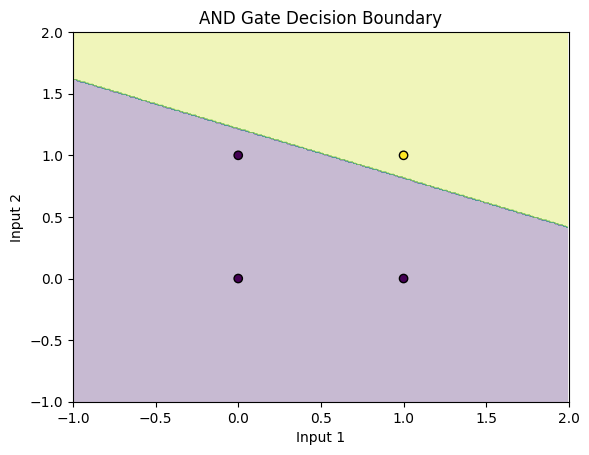

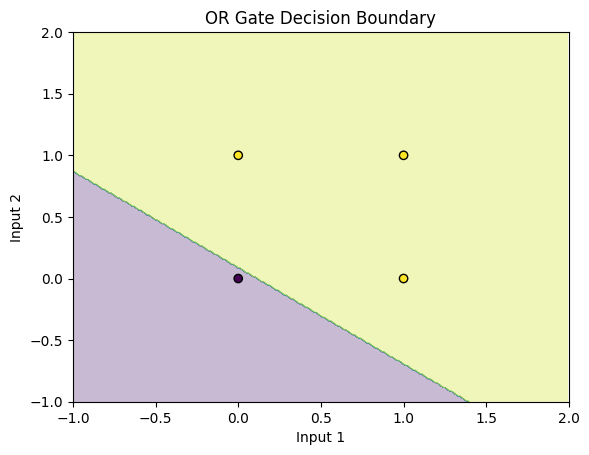

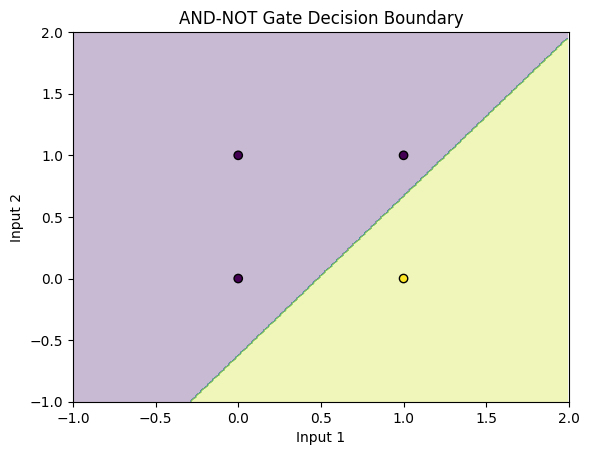

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(perceptron, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

# Assuming Perceptron class and fit method are already defined

# AND Gate Visualization
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
perceptron_and = Perceptron()
perceptron_and.fit(X_and, y_and)
plot_decision_boundary(perceptron_and, X_and, y_and, "AND Gate Decision Boundary")

# OR Gate Visualization
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
perceptron_or = Perceptron()
perceptron_or.fit(X_or, y_or)
plot_decision_boundary(perceptron_or, X_or, y_or, "OR Gate Decision Boundary")

# AND-NOT Gate Visualization
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([0, 0, 1, 0])
perceptron_and_not = Perceptron()
perceptron_and_not.fit(X_and_not, y_and_not)
plot_decision_boundary(perceptron_and_not, X_and_not, y_and_not, "AND-NOT Gate Decision Boundary")


### Questions

#### Why does the Single Layer Perceptron struggle to classify the XOR gate?
The XOR function is not linearly separable, meaning a single linear decision boundary cannot separate the outputs correctly.

#### What modifications can be made to the neural network model to handle the XOR gate correctly?
A multi-layer perceptron (MLP) with at least one hidden layer can be used, allowing the model to learn non-linear decision boundaries.


## Analysis and Evaluation

For each logic gate, the following results were obtained after training the Single Layer Perceptron, including weight configurations and decision boundaries.

### 1. AND Gate
- **Predictions:** [0, 0, 0, 1]
- **Weight Configuration:** The weights converged to values reflecting the necessity of both inputs being 1 for an output of 1.
- **Decision Boundary:** A linear boundary that separates the input combinations (1, 1) from the others.

### 2. OR Gate
- **Predictions:** [0, 1, 1, 1]
- **Weight Configuration:** The weights adjusted to ensure that any positive input (at least one being 1) results in an output of 1.
- **Decision Boundary:** A linear boundary that separates points corresponding to outputs 0 from those corresponding to outputs 1.

### 3. AND-NOT Gate
- **Predictions:** [0, 0, 1, 0]
- **Weight Configuration:** The weights reflect the necessity of having the first input as 1 and the second as 0 to yield an output of 1.
- **Decision Boundary:** A linear boundary that correctly classifies inputs according to the AND-NOT logic.

### 4. XOR Gate
- **Predictions:** [0, 1, 1, 0]
- **Weight Configuration:** The perceptron struggled to find a suitable weight configuration, resulting in incorrect classifications.
- **Decision Boundary:** No linear boundary can correctly separate the outputs, indicating the need for a more complex model.

### Visualizations
- **Plots:** Decision boundaries can be plotted for the AND, OR, and AND-NOT gates to visualize how the perceptron classifies inputs. For the XOR gate, a plot would demonstrate the failure of a linear decision boundary.


